In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 그래프 내에서 한글 사용
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

## 목차
1.  정기 예금을 신청한 사람들은 신청 안한 사람들과 뭐가 다를까?  
  
2. 집 대출, 일반 대출이 있는 사람도 정기 예금에 가입 했을까?  
  
3. 결혼한 사람들이 더 정기예금에 가입하지 않을까?  
  
4. 신용불량자도 정기예금 상품에 가입 할까?  
  
5. 영업 수단별 성공률 비교  
  
6. 연령대별 영업 성공률  
  
7. 교육과 예금 가입  
  
8. 종합 결론


In [3]:
df = pd.read_csv('./data/bank.csv', sep=';')
# The data is related with direct marketing campaigns of a Portuguese banking institution. 
# 1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
# 2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## 1. 정기 예금을 신청한 사람들은 신청 안한 사람들과 뭐가 다를까?

<AxesSubplot:title={'center':'정기예금에 가입한 사람과 그렇지 않은 사람 사이에서의 일부 항목 평균 비교'}>

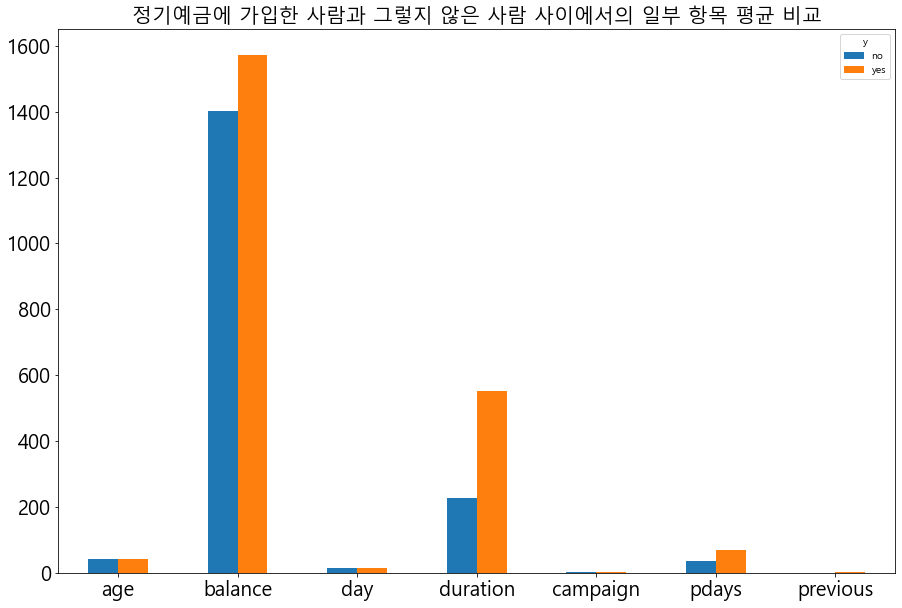

In [5]:
fig, ax = plt.subplots()
plt.title("정기예금에 가입한 사람과 그렇지 않은 사람 사이에서의 일부 항목 평균 비교", size=20)
df.groupby('y').mean().T.plot(kind='bar', rot=0, figsize=(15,10), ax=ax, fontsize=20)

### 1. 결과
정기 예금에 가입한 사람들과 그렇지 않은 사람의 평균을 비교해 보면  
가입한 사람 쪽이 예금 평균이 좀더 높고 (balance)  
마지막 상담에서 더 오래 대화했고 (duration)  
좀 더 오랜만에 홍보 연락을 받았다 (pdays)  


---

## 2. 집 대출, 일반 대출이 있는 사람도 정기 예금에 가입 했을까?

In [6]:
people_with_loans = df[['housing', 'loan','y']]

In [7]:
total_number_of_loan_peoples = df[['housing', 'loan']].value_counts()

In [8]:
total_number_of_loan_peoples

housing  loan
yes      no      2153
no       no      1677
yes      yes      406
no       yes      285
dtype: int64

In [9]:
people_with_loans.y = np.where(people_with_loans.y == 'yes', 1, 0)

In [10]:
success_number_of_people_with_loans = people_with_loans.groupby(['housing', 'loan']).sum()

In [11]:
success_number_of_people_with_loans

y
housing loan     
no      no    283
        yes    18
yes     no    195
        yes    25

In [12]:
success_rate_of_people_with_loans = (success_number_of_people_with_loans.y / total_number_of_loan_peoples) * 100

In [13]:
success_rate_of_people_with_loans

housing  loan
no       no      16.875373
         yes      6.315789
yes      no       9.057130
         yes      6.157635
dtype: float64

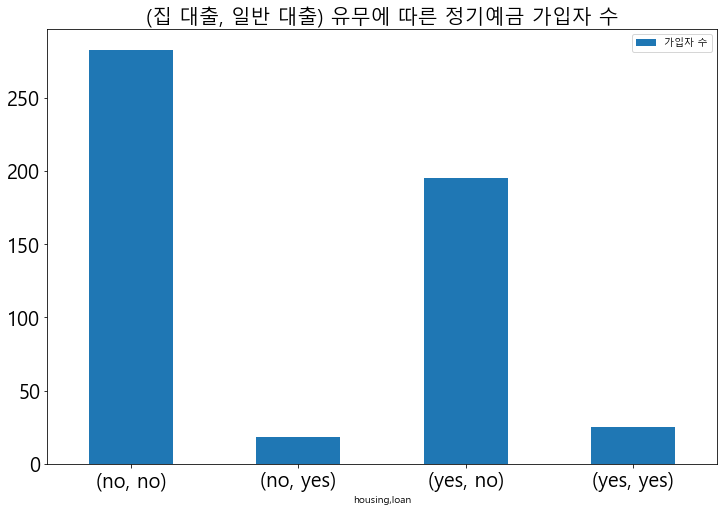

In [14]:
fig, ax = plt.subplots()
plt.title("(집 대출, 일반 대출) 유무에 따른 정기예금 가입자 수",size=20)
success_number_of_people_with_loans.plot(kind='bar', rot=0, figsize=(12,8), ax=ax, fontsize=20)
plt.legend(['가입자 수'])

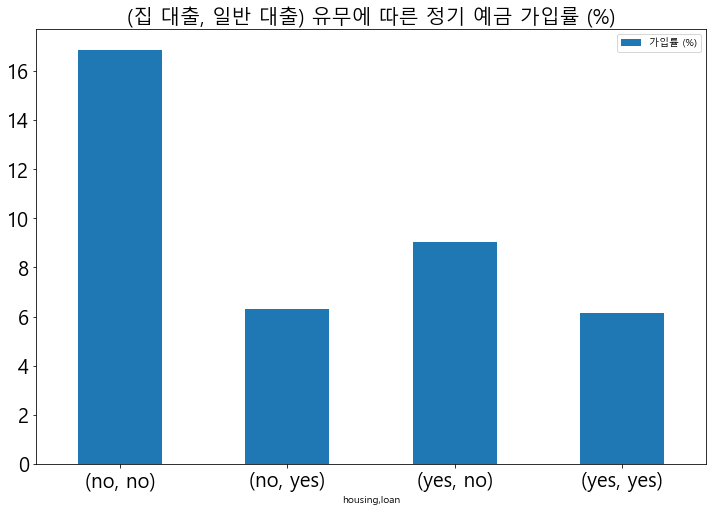

In [15]:
fig, ax = plt.subplots()
plt.title("(집 대출, 일반 대출) 유무에 따른 정기 예금 가입률 (%)",size=20)
success_rate_of_people_with_loans.plot(kind='bar', rot=0, figsize=(12,8), ax=ax, fontsize=20)
plt.legend(['가입률 (%)'])

### 2. 결과
(집 대출, 일반 대출)
대출이 아예 없는 그룹이 상품에 가입할 확률이 가장 높고  
하나라도 있으면 확률이 꽤 떨어진다  
일반 대출이 있는 사람은 가입하지 않을 확률이 높다

---

## 3. 결혼한 사람들이 더 정기예금에 가입하지 않을까?

In [16]:
married_single_divorced = df[['marital', 'y']]

In [17]:
married_single_divorced.y = np.where(married_single_divorced.y == 'yes', 1, 0)

In [18]:
total_number_of_marital = df['marital'].value_counts()
total_number_of_marital

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [19]:
success_number_of_marriage_single_divorce = married_single_divorced.groupby('marital').sum().sort_values(by='y', ascending=False)
success_number_of_marriage_single_divorce

,y
marital,
married,277
single,167
divorced,77


In [20]:
success_rate_of_marriage_single_divorce = (success_number_of_marriage_single_divorce.y / total_number_of_marital) * 100

In [21]:
success_rate_of_marriage_single_divorce

marital
married      9.903468
single      13.963211
divorced    14.583333
dtype: float64

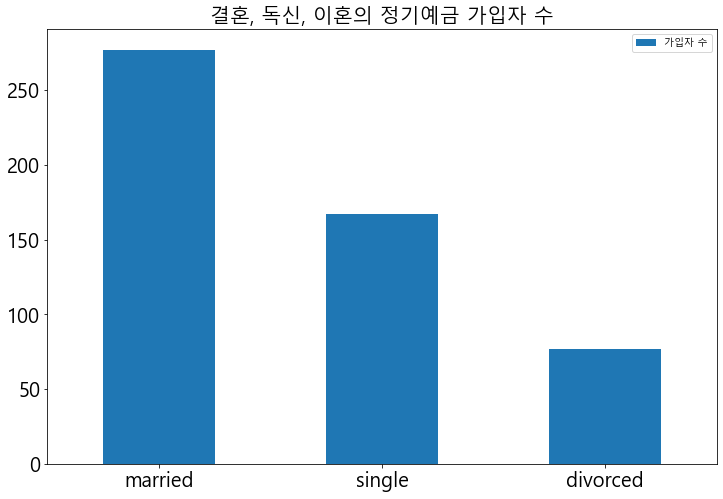

In [22]:
fig, ax = plt.subplots()
plt.title("결혼, 독신, 이혼의 정기예금 가입자 수",size=20)
success_number_of_marriage_single_divorce.plot(kind='bar', rot=0, figsize=(12,8), ax=ax, fontsize=20, xlabel='')
plt.legend(['가입자 수'])

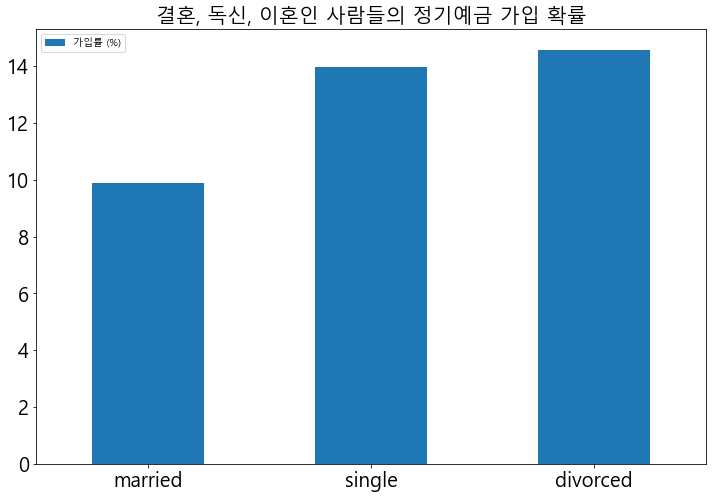

In [23]:
fig, ax = plt.subplots()
plt.title("결혼, 독신, 이혼인 사람들의 정기예금 가입 확률",size=20)
success_rate_of_marriage_single_divorce.plot(kind='bar', rot=0, figsize=(12,8), ax=ax, fontsize=20, xlabel='')
plt.legend(['가입률 (%)'])

### 3. 결과
가입자 수는 결혼한 사람이 많기는 한데  
확률로 생각하면 독신, 이혼자가 더 쉽게 예금 상품에 가입했음을 알 수 있다  
그러나 그 확률 차가 크지는 않다

---

## 4. 신용불량자도 정기예금 상품에 가입 할까?

In [24]:
credit_delinquency_y = df[['default', 'y']]

In [25]:
credit_delinquency_y.y = np.where(credit_delinquency_y.y == 'yes', 1, 0)
credit_delinquency_y.default = np.where(credit_delinquency_y.default == 'yes', 1, 0)

In [26]:
success_number_of_credit_delinquency = credit_delinquency_y.groupby(['default']).sum()

In [27]:
success_number_of_credit_delinquency.index = np.where(success_number_of_credit_delinquency.index == 0, "정상 신용", "신용불량")
success_number_of_credit_delinquency

,y
정상 신용,512
신용불량,9


In [28]:
total_number_of_credit_delinquency = df['default'].value_counts()
total_number_of_credit_delinquency.index = ["정상 신용", "신용불량"]
total_number_of_credit_delinquency

정상 신용    4445
신용불량       76
Name: default, dtype: int64

In [29]:
success_rate_of_credit_delinquency = (success_number_of_credit_delinquency.y / total_number_of_credit_delinquency) * 100

In [30]:
success_rate_of_credit_delinquency

정상 신용    11.518560
신용불량     11.842105
dtype: float64

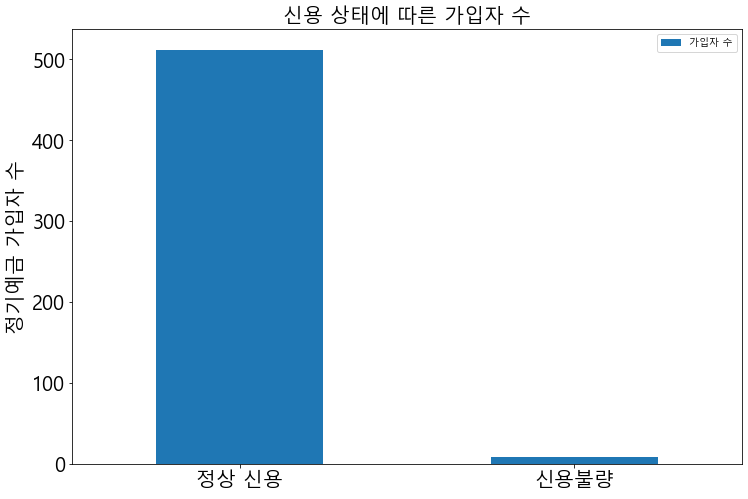

In [31]:
fig, ax = plt.subplots()
plt.title("신용 상태에 따른 가입자 수", fontsize=20)
success_number_of_credit_delinquency.plot(kind='bar',rot=0,figsize=(12,8), xlabel="", ylabel="가입자 수", fontsize=20, ax=ax)
plt.ylabel('정기예금 가입자 수', fontsize=20)
plt.legend(['가입자 수'])

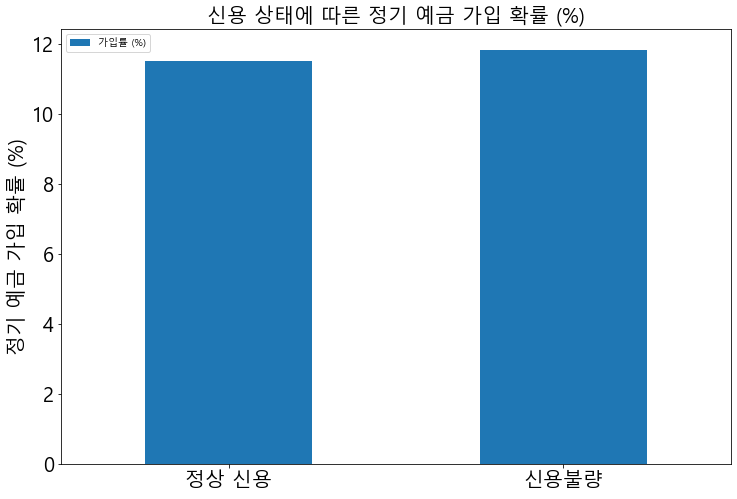

In [32]:
fig, ax = plt.subplots()
plt.title("신용 상태에 따른 정기 예금 가입 확률 (%)", fontsize=20)
success_rate_of_credit_delinquency.plot(kind='bar',rot=0,figsize=(12,8), xlabel="", ylabel="가입자 수", fontsize=20, ax=ax)
plt.ylabel('정기 예금 가입 확률 (%)', fontsize=20)
plt.legend(['가입률 (%)'])

### 4. 결과
대다수의 고객이 정상 신용이라서 정상 신용의 가입자가 많지만  
확률로 생각하면 신용불량자나 정상 신용자나 가입할 확률이 거의 같다

---

## 5. 영업 수단별 성공률 비교

In [33]:
contact_y = df[['contact', 'y']]

In [34]:
contact_y.y = np.where(contact_y.y == 'yes', 1, 0)

In [35]:
total_number_of_each_contact_way = contact_y.groupby('contact').count().y
total_number_of_each_contact_way

contact
cellular     2896
telephone     301
unknown      1324
Name: y, dtype: int64

In [36]:
success_number_of_each_contact_way = contact_y.groupby('contact').sum().y
success_number_of_each_contact_way

contact
cellular     416
telephone     44
unknown       61
Name: y, dtype: int32

In [37]:
success_rates = (success_number_of_each_contact_way / total_number_of_each_contact_way) * 100

In [38]:
success_rate_df = pd.DataFrame(index=['cellular', 'telephone', 'unknown'], columns=['가입률 (%)'])

In [39]:
success_rate_df['가입률 (%)'] = success_rates

In [40]:
success_rate_df.sort_values(by='가입률 (%)', ascending=False, inplace=True)

In [41]:
success_rate_df

,가입률 (%)
telephone,14.617940
cellular,14.364641
unknown,4.607251


<AxesSubplot:title={'center':'영업 수단별 성공률'}>

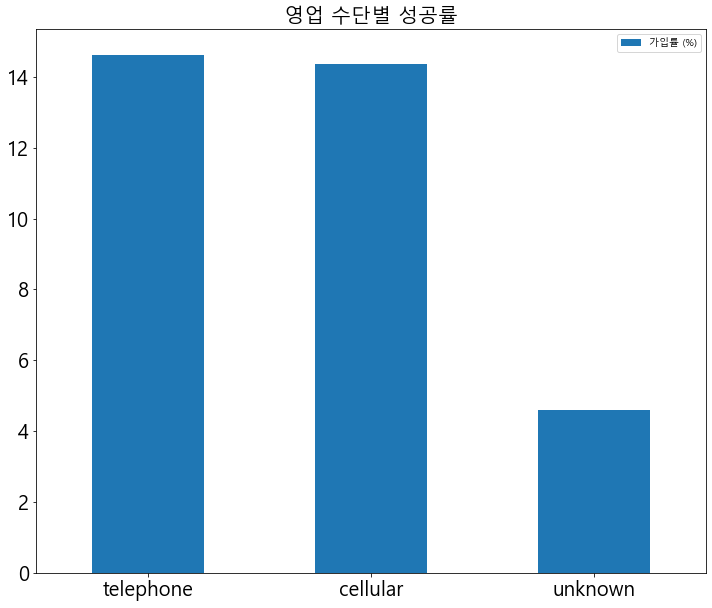

In [42]:
fig, ax = plt.subplots()
plt.title("영업 수단별 성공률", fontsize=20)
success_rate_df.plot(kind='bar',rot=0, figsize=(12,10), ax=ax, fontsize=20)

### 5. 결과
영업 성공률이 높은 순서는 유선, 무선, 기타 순인데  
유선, 무선의 차이는 사실상 거의 없다

---

## 6. 연령대별 영업 성공률

In [43]:
df.age.unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64)

In [44]:
bins = [20,30,40,50,60,70,80,90]
label = ['20대', '30대', '40대', '50대', '60대', '70대', '80대']
df['연령 구분'] = pd.cut(df['age'], bins=bins, labels=label)

In [45]:
age_y = df[['연령 구분', 'y']]

In [46]:
age_y.y = np.where(age_y.y == 'yes', 1, 0)

In [47]:
success_number_of_each_age_group = age_y.groupby('연령 구분').sum().y
success_number_of_each_age_group

연령 구분
20대     87
30대    178
40대    123
50대     82
60대     24
70대     20
80대      4
Name: y, dtype: int32

In [48]:
total_number_of_each_age = df['연령 구분'].value_counts()
total_number_of_each_age.sort_index(inplace=True)
total_number_of_each_age

20대     625
30대    1800
40대    1162
50대     800
60대      73
70대      46
80대       8
Name: 연령 구분, dtype: int64

In [49]:
success_rate_of_each_age = (success_number_of_each_age_group / total_number_of_each_age) * 100
success_rate_of_each_age

연령 구분
20대    13.920000
30대     9.888889
40대    10.585198
50대    10.250000
60대    32.876712
70대    43.478261
80대    50.000000
dtype: float64

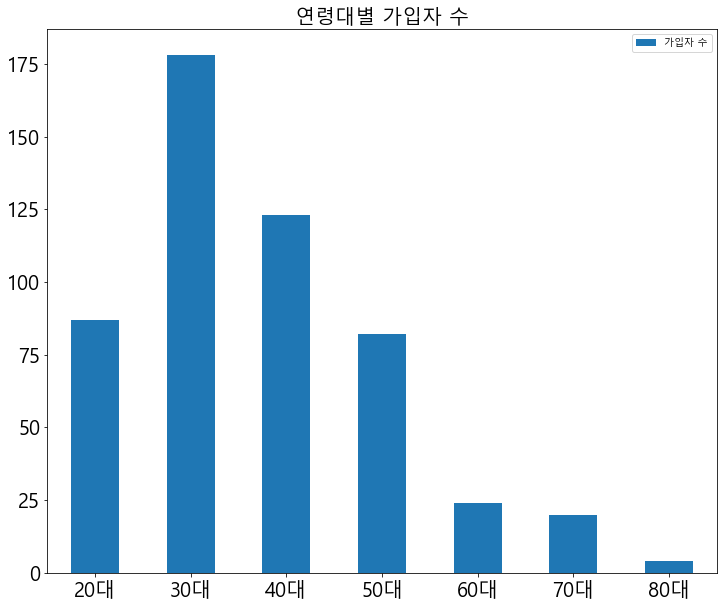

In [50]:
fig, ax = plt.subplots()
plt.title("연령대별 가입자 수", fontsize=20)
success_number_of_each_age_group.plot(kind='bar', rot=0, figsize=(12,10), xlabel='', fontsize=20, ax=ax)
plt.legend(['가입자 수'])

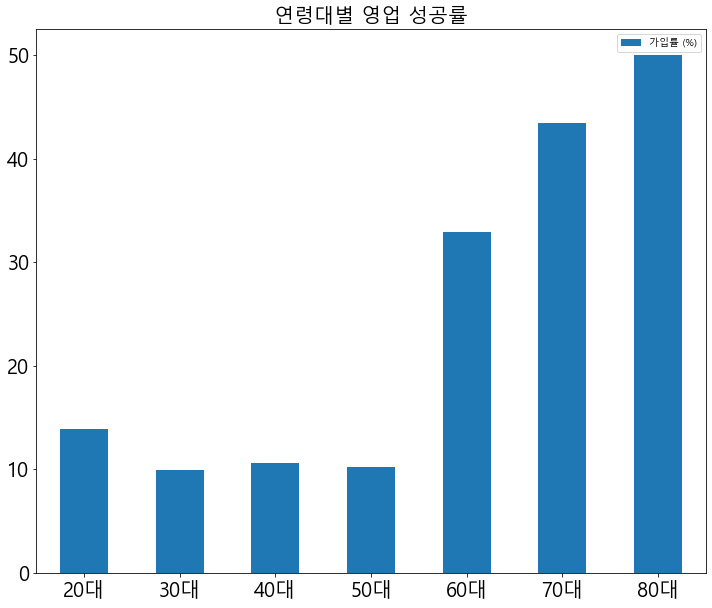

In [51]:
fig, ax = plt.subplots()
plt.title("연령대별 영업 성공률", fontsize=20)
success_rate_of_each_age.plot(kind='bar', rot=0, figsize=(12,10), xlabel='', fontsize=20, ax=ax)
plt.legend(['가입률 (%)'])

### 6. 결과
가입 횟수는 30대가 가장 많은데  
영업 시도 횟수 대비로 생각하면 80대가 가장 성공률이 높다

---

## 7. 교육과 예금 가입

In [52]:
education_y = df[['education', 'y']]

In [53]:
education_y.y = np.where(education_y.y == 'yes', 1, 0)

In [54]:
total_number_of_each_education_level = education_y['education'].value_counts()
total_number_of_each_education_level

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [55]:
success_number_of_each_education_level = education_y.groupby('education').sum()
success_number_of_each_education_level.sort_values(by='y', ascending=False, inplace=True)
success_number_of_each_education_level = success_number_of_each_education_level.y
success_number_of_each_education_level

education
secondary    245
tertiary     193
primary       64
unknown       19
Name: y, dtype: int32

In [56]:
success_rate_of_each_education_level = (success_number_of_each_education_level / total_number_of_each_education_level) * 100
success_rate_of_each_education_level

education
secondary    10.624458
tertiary     14.296296
primary       9.439528
unknown      10.160428
dtype: float64

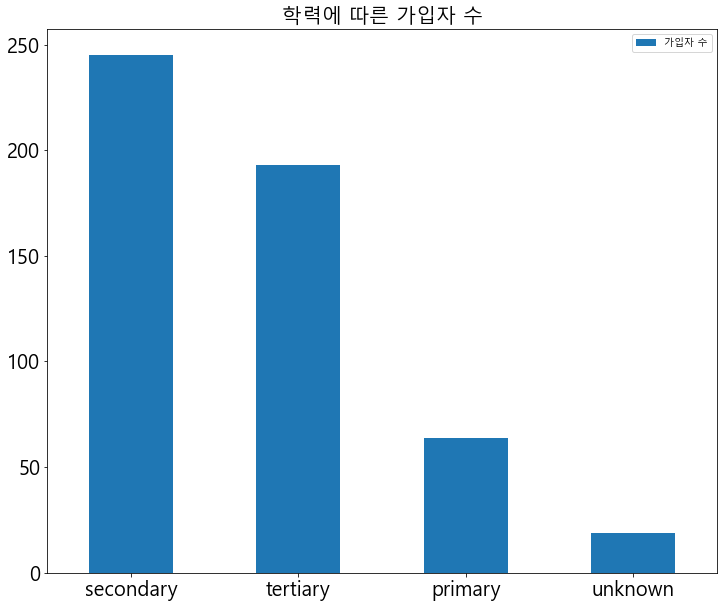

In [57]:
fig, ax = plt.subplots()
plt.title("학력에 따른 가입자 수", fontsize=20)
success_number_of_each_education_level.plot(kind='bar', rot=0, figsize=(12,10), xlabel='', fontsize=20, ax=ax)
plt.legend(['가입자 수'])

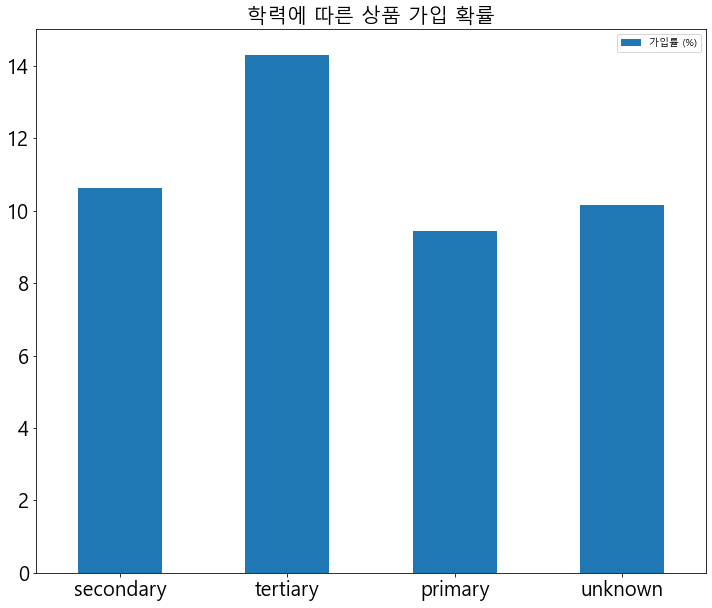

In [58]:
fig, ax = plt.subplots()
plt.title("학력에 따른 상품 가입 확률", fontsize=20)
success_rate_of_each_education_level.plot(kind='bar', rot=0, figsize=(12,10), xlabel='', fontsize=20, ax=ax)
plt.legend(['가입률 (%)'])

### 7. 결과
tertiary군이 가장 상품에 가입할 확률이 높다

# 8. 종합 결론

1번의 pdays 평균 값으로 미루어 볼때  
이런 캠페인을 65~75일 정도에 한번 하는 것이 좋을 것 같다.  
  
  
그리고 2번과 6번 항목을 고려할때 1순위로 영업할 대상은  
60대 이상의 대출이 없는 사람들 이다.  
  
또 그 중에서도 독신, 이혼일수록,    
tertiary 일수록 좋지만 확률 차이가 크지는 않다.  
  
그리고 영업 수단은 telephone, cellular중에 아무거나 사용하면 될 것이고  
예금상품을 권유하는 상황에서 고객의 신용 상태는 크게 신경쓰지 않아도 될 것이다

---